In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [2]:
## Data for microwave Opening 30 deg
y2_bel = np.array([0., 0.32, 0.488, 0.523, 0.5235, 0.5235, 0.5235,
                   0.5234, 0.5235, 0.5235])
y2_err = np.array([0.500000, 0.166667, 0.125000, 0.119048, 0.118182, 
                   0.118056, 0.118037, 0.118034, 0.118034, 0.118034])

y2_gt = np.array([0.087266, 0.3, 0.462, 0.488, 0.488, 0.488, 
                  0.488, 0.488, 0.489, 0.489])

print("y2_plan = ", y2_bel)
print("y2_gt = ", y2_gt)
print("y2_err = ", y2_err)

y2_plan =  [0.000000 0.320000 0.488000 0.523000 0.523500 0.523500 0.523500 0.523400
 0.523500 0.523500]
y2_gt =  [0.087266 0.300000 0.462000 0.488000 0.488000 0.488000 0.488000 0.488000
 0.489000 0.489000]
y2_err =  [0.500000 0.166667 0.125000 0.119048 0.118182 0.118056 0.118037 0.118034
 0.118034 0.118034]


In [3]:
## Data for microwave closing 30 deg
y3_bel = np.array([0.649, 0.349, 0.149, 0.12, 0.08, 0.07, 
                  0.05, 0.05, 0.05, 0.05])
y3_err = np.array([0.5, 0.4969, 0.3956, 0.2896, 0.2043, 0.118182, 
                   0.118056, 0.118037, 0.118034, 0.118034])
y3_gt = np.array([0.489, 0.189, 0.15, 0.12, 0.11 , 0.11,
                  0.11, 0.11, 0.11, 0.11])

print("y3_plan = ", y3_bel)
print("y3_err = ", y3_err)
print("y3_gt = ", y3_gt)

y3_plan =  [0.649000 0.349000 0.149000 0.120000 0.080000 0.070000 0.050000 0.050000
 0.050000 0.050000]
y3_err =  [0.500000 0.496900 0.395600 0.289600 0.204300 0.118182 0.118056 0.118037
 0.118034 0.118034]
y3_gt =  [0.489000 0.189000 0.150000 0.120000 0.110000 0.110000 0.110000 0.110000
 0.110000 0.110000]


In [4]:
## Data for 50 deg
y4_bel = np.array([0.087, 0.387, 0.688, 0.835, 0.872, 0.872,
                   0.872, 0.872, 0.872, 0.872])
y4_err = np.array([0.5, 0.4969, 0.3956, 0.2896, 0.2043, 0.118182, 
                   0.118056, 0.118037, 0.118034, 0.118034])
y4_gt = np.array([0.11, 0.325, 0.601, 0.755, 0.79, 0.802,
                  0.802, 0.802, 0.802, 0.802])

print("y4_plan = ", y4_bel)
print("y4_err = ", y4_err)
print("y4_gt = ", y4_gt)

y4_plan =  [0.087000 0.387000 0.688000 0.835000 0.872000 0.872000 0.872000 0.872000
 0.872000 0.872000]
y4_err =  [0.500000 0.496900 0.395600 0.289600 0.204300 0.118182 0.118056 0.118037
 0.118034 0.118034]
y4_gt =  [0.110000 0.325000 0.601000 0.755000 0.790000 0.802000 0.802000 0.802000
 0.802000 0.802000]


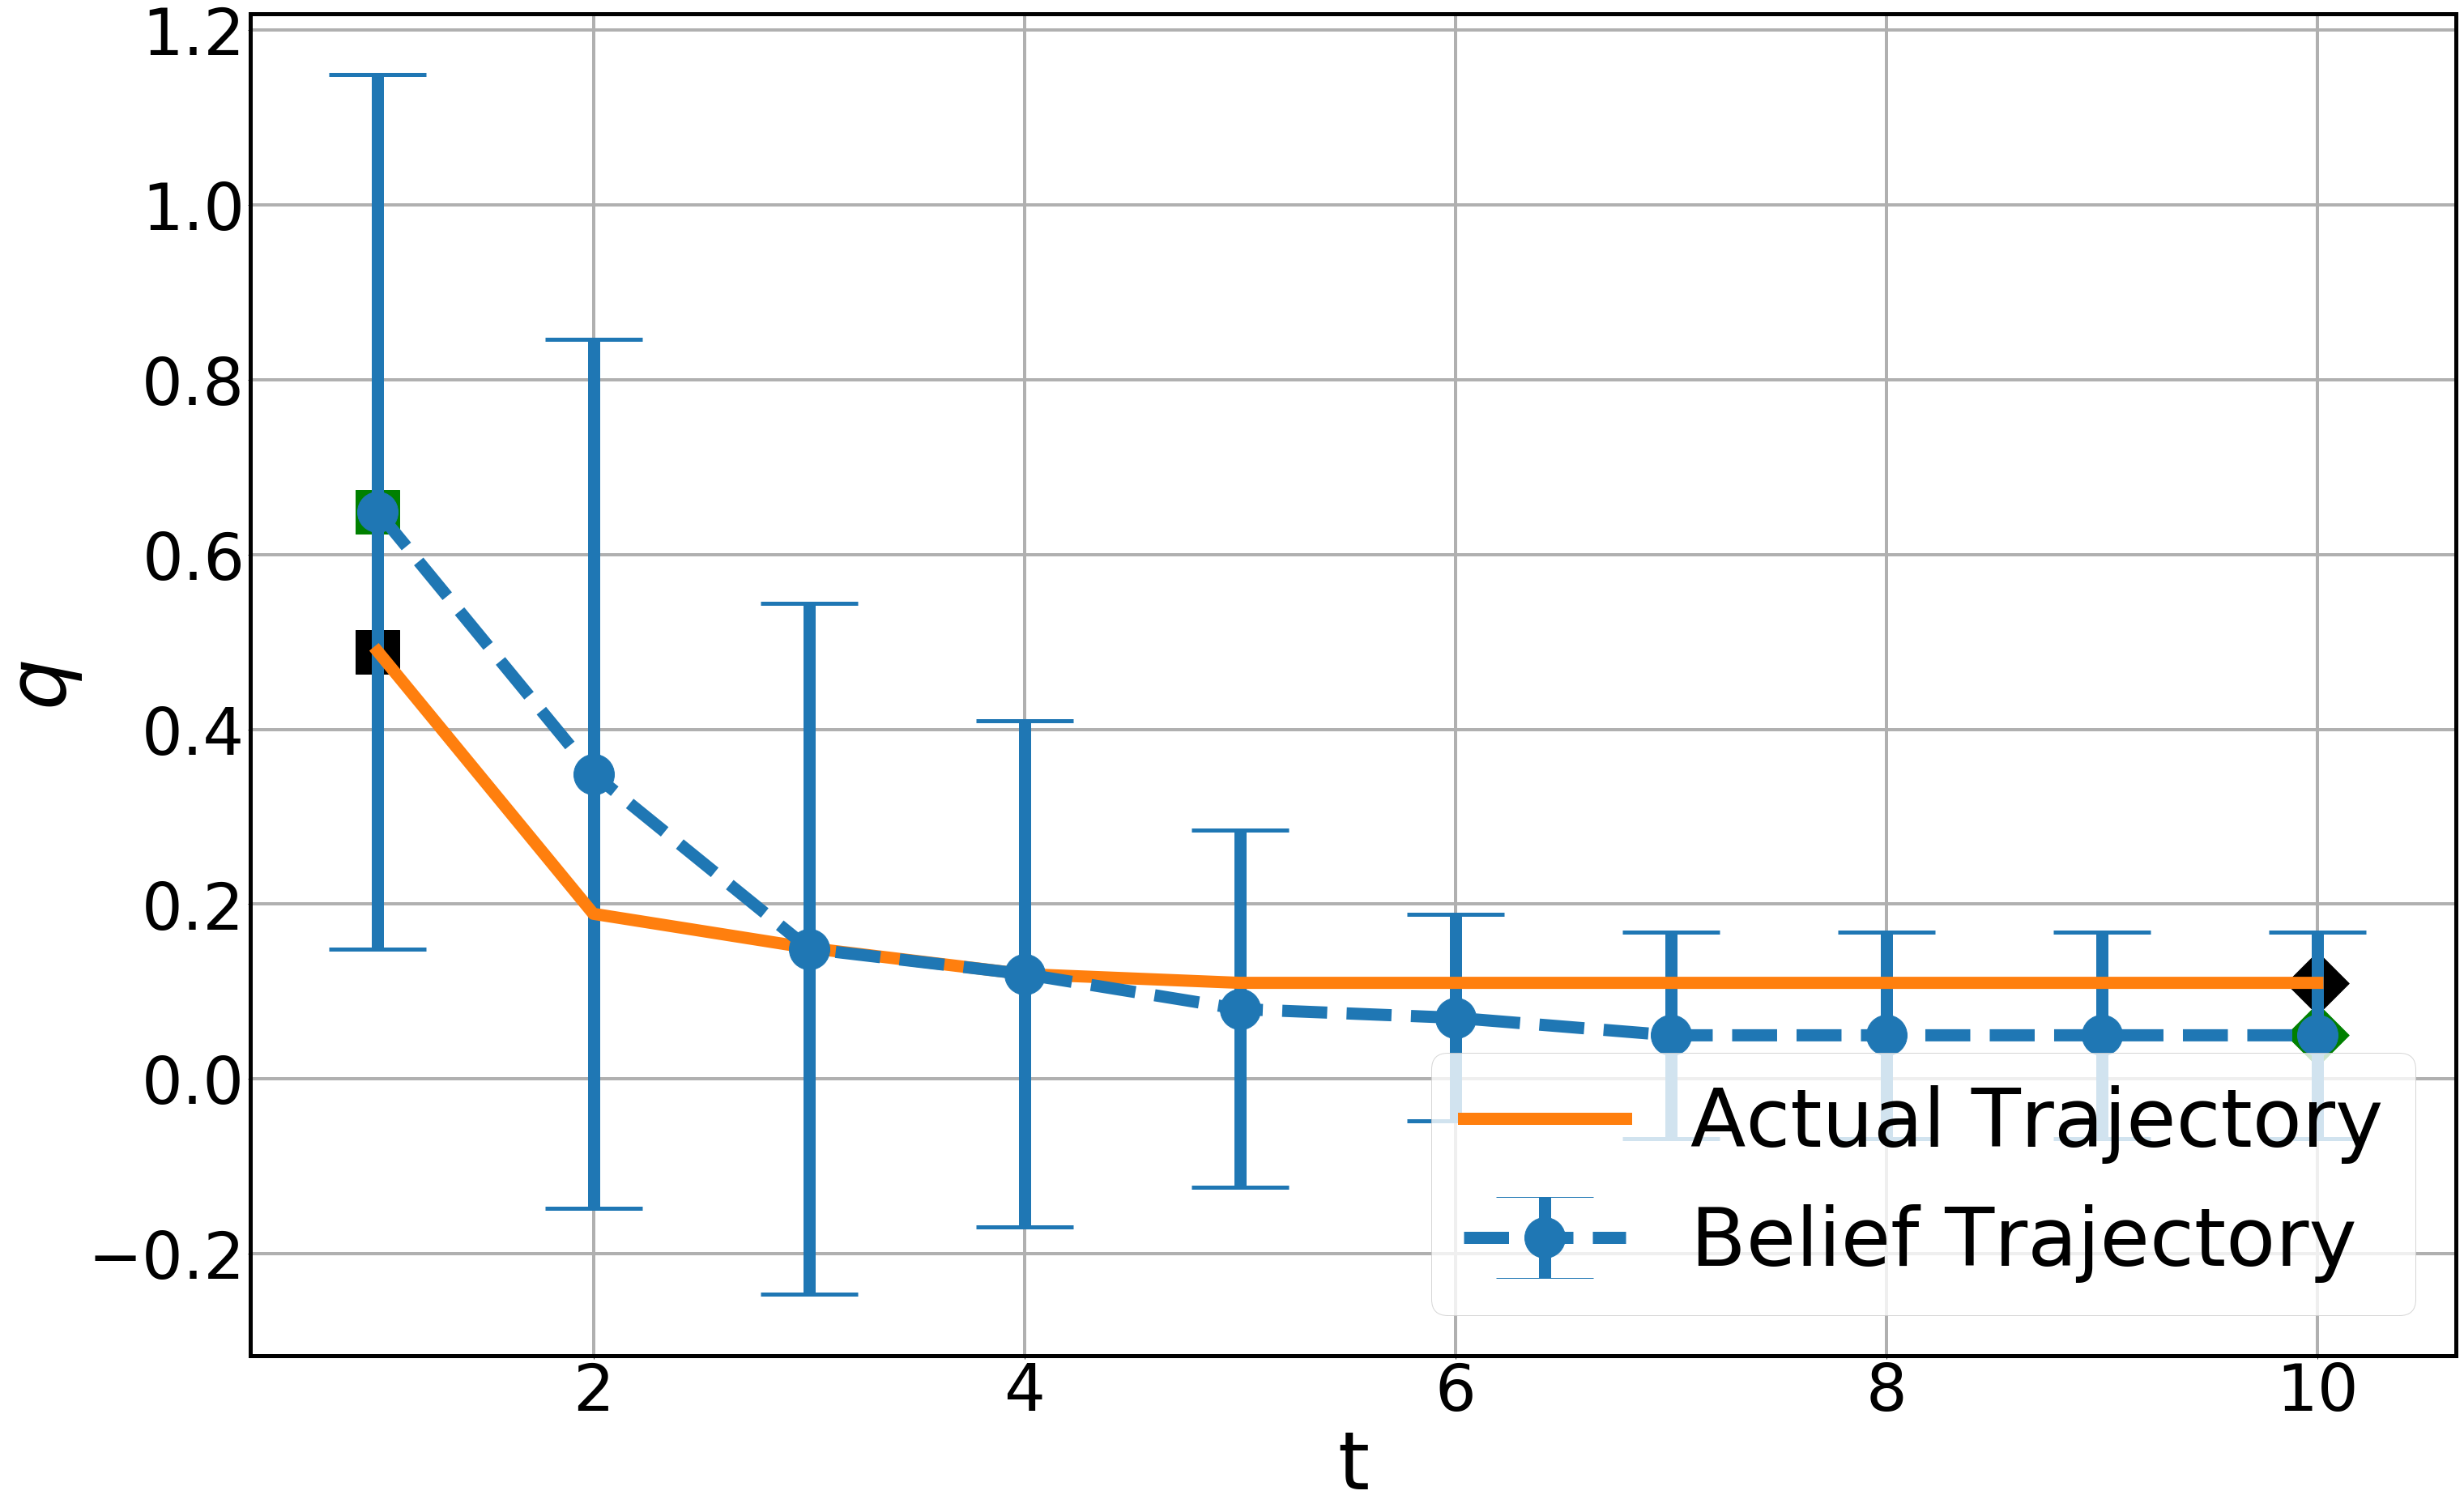

In [8]:
fig = plt.figure(figsize=(40,25))
x = np.arange(1, 11, 1)


## Belief Trajectory
# y = y2_bel
# y_err = y2_err
# y_gt = y2_gt

y = y3_bel
y_err = y3_err
y_gt = y3_gt


(_, caps, _) = plt.errorbar(x, y, yerr=y_err, label='Belief Trajectory', 
             fmt='o--', markersize=50, capsize=60, linewidth=15.0)


## Actual Trajectory
plt.plot(x, y_gt, label="Actual Trajectory", linewidth=15.0)

## Plot start and end points
plt.scatter([x[0]], [y[0]], c="g", marker="s", s=[3000])
plt.scatter([x[-1]], [y[-1]], c="g", marker="D", s=[3000])

plt.scatter([x[0]], [y_gt[0]], c="k", marker="s", s=[3000])
plt.scatter([x[-1]], [y_gt[-1]], c="k", marker="D", s=[3000])

## Settings
plt.xlabel('t', fontsize=100)
plt.ylabel('$q$', fontsize=100)
plt.legend(loc='lower right', prop={'size': 100})
plt.tight_layout()

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=80)
ax.grid(True, linewidth=4)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(5.)


for cap in caps:
    cap.set_markeredgewidth(5)

In [6]:
err2 = abs(y2_gt[-1] - y2_bel[-1])
err3 = abs(y3_gt[-1] - y3_bel[-1])
err4 = abs(y4_gt[-1] - y4_bel[-1])

errs = np.array([err2, err3, err4])

print("Error2 : ", err2)
print("Error3 : ", err3)
print("Error4 : ", err4)
print("Mean_err : ", np.mean(errs))
print("std_err : ", np.std(errs))

## Delta Q
delta_2 = abs((err2)/(y2_gt[-1] - y2_gt[0]))
delta_3 = abs((err3)/(y3_gt[-1] - y3_gt[0]))
delta_4 = abs((err4)/(y4_gt[-1] - y4_gt[0]))

print("\n")
print("Delta 2 : ", delta_2)
print("Delta 3 : ", delta_3)
print("Delta 4 : ", delta_4)

deltas = np.array([delta_2, delta_3, delta_4])
print("Mean_deltas : ", np.mean(deltas))
print("std_deltas : ", np.std(deltas))

Error2 :  0.034499999999999975
Error3 :  0.06
Error4 :  0.06999999999999995
Mean_err :  0.05483333333333331
std_err :  0.014946199814296901


Delta 2 :  0.08587772008343823
Delta 3 :  0.15831134564643798
Delta 4 :  0.10115606936416177
Mean_deltas :  0.115115045031346
std_deltas :  0.03117474703781886
